### This was my internship major project
### the problem statment was to identify whether the customer is fraud or not based on there past transactions
### First we shall import the necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Then we import the Datasets

In [2]:
data1 = pd.read_csv(r'C:\Users\prajw\Desktop\Verzeo\Transaction.csv')
data2 = pd.read_csv(r'C:\Users\prajw\Desktop\Verzeo\Customer_DF (1).csv')
data1

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
5,5,andersonwilliam@yahoo.com,q3lyvbza,yk34y2,8pneoi03z,0,card,JCB 16 digit,33,0,failed
6,6,andersonwilliam@yahoo.com,3alf9irw,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,1,fulfilled
7,7,andersonwilliam@yahoo.com,69w9wymx,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,0,fulfilled
8,8,andersonwilliam@yahoo.com,pegqc4ud,itnk8y,dluy3jka0,0,card,Discover,25,1,fulfilled
9,9,andersonwilliam@yahoo.com,uo3slwh7,itnk8y,8pneoi03z,0,card,JCB 16 digit,25,0,fulfilled


### Since we have two Datasets, we need to merge them and remove some of the insignificant fields that we know for sure


In [3]:
#Merging the two Datasets, May require 1 to 2 mins of runtime, computationally expenssive
data = pd.DataFrame()
data = data2.filter(['customerEmail','No_Transactions','No_Orders','No_Payments'], axis=1)
data['paymentMethodRegistrationFailure'] = 0
data['transactionAmount'] = 0
data['transactionFailed'] = 0
for index2,rows2 in data2.iterrows():
    for index,rows in data1.iterrows():
        if rows['customerEmail'] == rows2['customerEmail']:
            temp = rows['paymentMethodType']
            data.at[index2, 'transactionAmount'] += data1.at[index, 'transactionAmount']
            data.at[index2, 'paymentMethodRegistrationFailure'] += data1.at[index, 'paymentMethodRegistrationFailure']
            data.at[index2, 'transactionFailed'] += data1.at[index, 'transactionFailed']
            if temp not in data:
                data[temp] = 0
            data.at[index2, temp] += 1

for index2,rows2 in data2.iterrows():
    for index,rows in data1.iterrows():
        if rows['customerEmail'] == rows2['customerEmail']:
            temp = rows['paymentMethodProvider']
            if temp not in data:
                data[temp] = 0
            data.at[index2, temp] += 1
            
for index2,rows2 in data2.iterrows():
    for index,rows in data1.iterrows():
        if rows['customerEmail'] == rows2['customerEmail']:
            temp = rows['orderState']
            if temp not in data:
                data[temp] = 0
            data.at[index2, temp] += 1
            
data

,customerEmail,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,card,bitcoin,apple pay,...,Discover,Voyager,VISA 13 digit,Maestro,Mastercard,Diners Club / Carte Blanche,JCB 15 digit,pending,fulfilled,failed
0,josephhoward@yahoo.com,2,2,1,2,44,0,2,0,0,...,0,0,0,0,0,0,0,1,1,0
1,evansjeffery@yahoo.com,3,3,7,1,111,1,0,3,0,...,0,0,0,0,0,0,0,0,3,0
2,andersonwilliam@yahoo.com,5,3,2,0,131,2,5,0,0,...,1,0,0,0,0,0,0,0,4,1
3,rubenjuarez@yahoo.com,3,3,1,0,85,0,3,0,0,...,0,3,0,0,0,0,0,0,3,0
4,uchen@malone.com,7,7,6,0,411,2,4,0,3,...,0,0,1,0,0,0,0,0,6,1
5,robinsoncynthia@dunn.com,1,1,2,0,25,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,samuel15@saunders-rhodes.com,2,1,2,0,80,1,0,0,2,...,0,0,2,0,0,0,0,0,2,0
7,johnlowery@gmail.com,6,5,2,0,1033,6,24,3,0,...,0,3,0,5,0,0,0,0,25,3
8,jameslandry@rodriguez.com,5,2,1,0,109,3,5,0,0,...,5,0,0,0,0,0,0,4,1,0
9,ubranch@rivera-parker.info,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Below are the various graphs plotted for Exploratory Data Analysis and Data Visualiztion

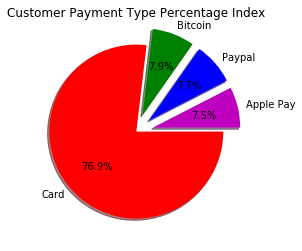

In [4]:
a = data1.paymentMethodType.value_counts()
figureObject, axesObject = plt.subplots()
colors = ['r', 'g', 'b', 'm']
labels = ['Card', 'Bitcoin', 'Paypal','Apple Pay']
explode = (0, 0.2, 0.2, 0.2)
plt.pie(a, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',radius = 1,
counterclock=False, shadow=True)
plt.title("Customer Payment Type Percentage Index")
plt.show()

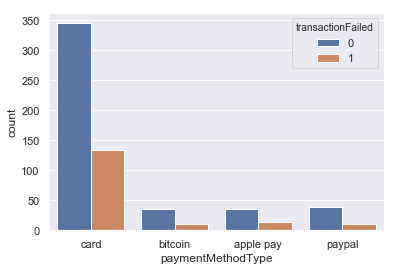

In [5]:
#Visualization
import seaborn as sns
sns.set(style="darkgrid")

p = sns.countplot(data=data1, x='paymentMethodType', hue='transactionFailed')
plt.show()

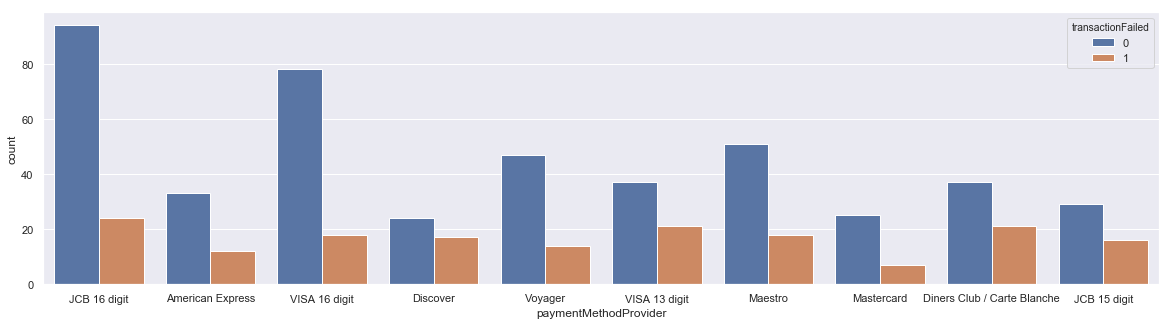

In [6]:
plt.figure(figsize=(20,5))
q = sns.countplot(data=data1, x='paymentMethodProvider', hue='transactionFailed')
plt.show()

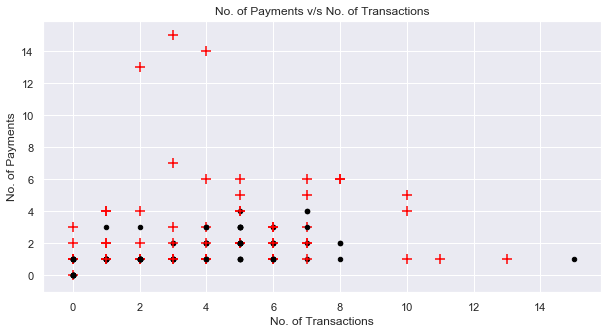

In [7]:
plt.figure(figsize=(10,5))
for index,row in data2.iterrows():
    if data2.at[index, 'Fraud'] == True:
        plt.scatter(data2.at[index,'No_Transactions'], data2.at[index, 'No_Payments'], marker='+', c='red', s=100)
    else:
        plt.scatter(data2.at[index,'No_Transactions'], data2.at[index, 'No_Payments'], marker='o', c='black',s=20)
plt.xlabel('No. of Transactions')
plt.ylabel('No. of Payments')
plt.title('No. of Payments v/s No. of Transactions')
plt.show()

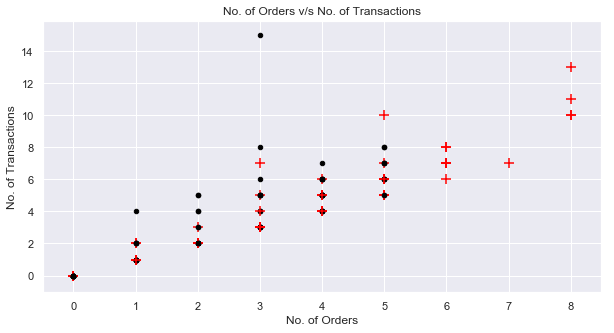

In [8]:
plt.figure(figsize=(10,5))
for index,row in data2.iterrows():
    if data2.at[index, 'Fraud'] == True:
        plt.scatter(data2.at[index,'No_Orders'], data2.at[index, 'No_Transactions'], marker='+', c='red', s=100)
    else:
        plt.scatter(data2.at[index,'No_Orders'], data2.at[index, 'No_Transactions'], marker='o', c='black',s=20)
        
plt.xlabel('No. of Orders')
plt.ylabel('No. of Transactions')
plt.title('No. of Orders v/s No. of Transactions')
plt.show()

### We create a new DataFrame df so that we can maintain a proper version of the complete Dataset at all times

In [9]:
df = data
df = df.drop(labels=['customerEmail'], axis=1)
df['Fraud'] = 0
for index,row in data.iterrows():
    if data2.at[index, 'Fraud'] == True:
        df.at[index, 'Fraud'] = 1
df

,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,card,bitcoin,apple pay,paypal,...,Voyager,VISA 13 digit,Maestro,Mastercard,Diners Club / Carte Blanche,JCB 15 digit,pending,fulfilled,failed,Fraud
0,2,2,1,2,44,0,2,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,3,3,7,1,111,1,0,3,0,0,...,0,0,0,0,0,0,0,3,0,1
2,5,3,2,0,131,2,5,0,0,0,...,0,0,0,0,0,0,0,4,1,0
3,3,3,1,0,85,0,3,0,0,0,...,3,0,0,0,0,0,0,3,0,0
4,7,7,6,0,411,2,4,0,3,0,...,0,1,0,0,0,0,0,6,1,1
5,1,1,2,0,25,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6,2,1,2,0,80,1,0,0,2,0,...,0,2,0,0,0,0,0,2,0,1
7,6,5,2,0,1033,6,24,3,0,1,...,3,0,5,0,0,0,0,25,3,1
8,5,2,1,0,109,3,5,0,0,0,...,0,0,0,0,0,0,4,1,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Dummy Variable Traps are removed for increased accuracy in our model

In [10]:
df = df.drop(labels=['paypal', 'Mastercard', 'pending' ], axis=1)
df

,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,card,bitcoin,apple pay,JCB 16 digit,...,VISA 16 digit,Discover,Voyager,VISA 13 digit,Maestro,Diners Club / Carte Blanche,JCB 15 digit,fulfilled,failed,Fraud
0,2,2,1,2,44,0,2,0,0,2,...,0,0,0,0,0,0,0,1,0,0
1,3,3,7,1,111,1,0,3,0,0,...,1,0,0,0,0,0,0,3,0,1
2,5,3,2,0,131,2,5,0,0,4,...,0,1,0,0,0,0,0,4,1,0
3,3,3,1,0,85,0,3,0,0,0,...,0,0,3,0,0,0,0,3,0,0
4,7,7,6,0,411,2,4,0,3,3,...,2,0,0,1,0,0,0,6,1,1
5,1,1,2,0,25,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6,2,1,2,0,80,1,0,0,2,0,...,0,0,0,2,0,0,0,2,0,1
7,6,5,2,0,1033,6,24,3,0,7,...,10,0,3,0,5,0,0,25,3,1
8,5,2,1,0,109,3,5,0,0,0,...,0,5,0,0,0,0,0,1,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Now we are ready to extract our feature matrix and label matrix, as done below

In [11]:
#Preparing the X and Y matrices
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### We will be using Backward Elimination to select significant features

In [12]:
import statsmodels.api as sm

def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        logit = sm.Logit(y, x).fit()
        maxVar = max(logit.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (logit.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    logit.summary()
    return x
 
SL = 0.05
X_Modeled = backwardElimination(X, SL)

Optimization terminated successfully.
         Current function value: 0.468732
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.468741
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.468753
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.468791
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.469091
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.469517
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.469701
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.470109
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.471362
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

### Once we have the desired Attributes we can now split the data into training and test sets

In [13]:
#Splitting the DataSet
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Modeled, y, test_size=1/3,shuffle=False, random_state=1)

### We will be creating a logistic regression model as well as a support vector classifier with a linear kernel

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Sourav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
from sklearn import svm
svc = svm.SVC(kernel="linear")
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Given Below are the various metrics that can be used to decide the usefullness of the model

In [16]:
y_pred_log = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set: 78.57


In [17]:
y_pred_svm = svc.predict(X_test)
print('Accuracy of support vector classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)*100))

Accuracy of support vector classifier on test set: 78.57


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_log)
print("Logistic Regression \n",confusion_matrix)

Logistic Regression 
 [[33  3]
 [ 9 11]]


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_svm)
print("Support Vector Classifier \n",confusion_matrix)

Support Vector Classifier 
 [[33  3]
 [ 9 11]]


## Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt1= DecisionTreeClassifier()

In [31]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
y_dt_predict =dt1.predict(X_test)

In [66]:
cm4 = confusion_matrix(y_test , y_dt_predict)

In [67]:
print("Accuracy of the model in test  {}".format(np.trace(cm4)/np.sum(cm4)*100))

Accuracy of the model in test  67.85714285714286


## Now we would use the principal component analysis

In [68]:
from sklearn.decomposition import PCA
ds= PCA(n_components=3)
ds.fit(X_train)
ds.fit(X_test)



PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [69]:
ds.explained_variance_ratio_

array([9.99804363e-01, 1.46580074e-04, 3.02214398e-05])

In [70]:
pca_train= ds.transform(X_train)
pca_test = ds.transform(X_test)

## Applying the svm

In [71]:
from sklearn import svm
svc = svm.SVC(kernel="linear")
svc.fit(pca_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [72]:
y_svc_predict = svc.predict(pca_test)

In [73]:
y_svc_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_svc_predict)

cm1

array([[36,  0],
       [ 9, 11]], dtype=int64)

In [75]:
print("Accuracy of the model in test  {}".format(np.trace(cm1)/np.sum(cm1)*100))

Accuracy of the model in test  83.92857142857143


In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_svc_predict))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        36
           1       1.00      0.55      0.71        20

   micro avg       0.84      0.84      0.84        56
   macro avg       0.90      0.78      0.80        56
weighted avg       0.87      0.84      0.82        56



## Applying the Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [78]:
log= LogisticRegression()
log.fit(pca_train,y_train)

C:\Users\Sourav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
y_log_predict =log.predict(pca_test)

In [80]:
cm2 = confusion_matrix(y_test,y_log_predict)

In [81]:
print("Accuracy of the model in test  {}".format(np.trace(cm2)/np.sum(cm2)*100))

Accuracy of the model in test  78.57142857142857


In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_log_predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        36
           1       0.79      0.55      0.65        20

   micro avg       0.79      0.79      0.79        56
   macro avg       0.79      0.73      0.75        56
weighted avg       0.79      0.79      0.78        56



## Applying the Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier


In [84]:
dt = DecisionTreeClassifier()

In [85]:
dt.fit(pca_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
y_dt_predict =dt.predict(pca_test)

In [87]:
cm3 = confusion_matrix(y_test,y_dt_predict)

In [88]:
print("Accuracy of the model in test  {}".format(np.trace(cm3)/np.sum(cm3)*100))

Accuracy of the model in test  75.0


## Applying the Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier


In [90]:
rf=RandomForestClassifier(n_estimators=100)

In [91]:
rf.fit(pca_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
y_rf_predict = rf.predict(pca_test)

In [93]:
cm4 = confusion_matrix(y_test,y_rf_predict)

In [64]:
print("Accuracy of the model in test  {}".format(np.trace(cm4)/np.sum(cm4)*100))

Accuracy of the model in test  78.57142857142857


## Inferences: 

#### 1. No. of Transactions
#### 2. No. of Payments
#### 3. Transaction Amount
#### 4. Voyager ( Payment Method Provider)

### These are the significant attributes for the model